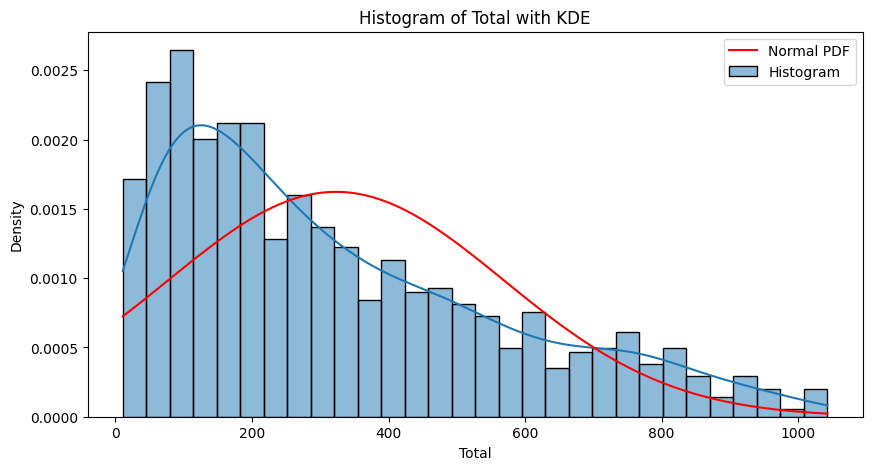

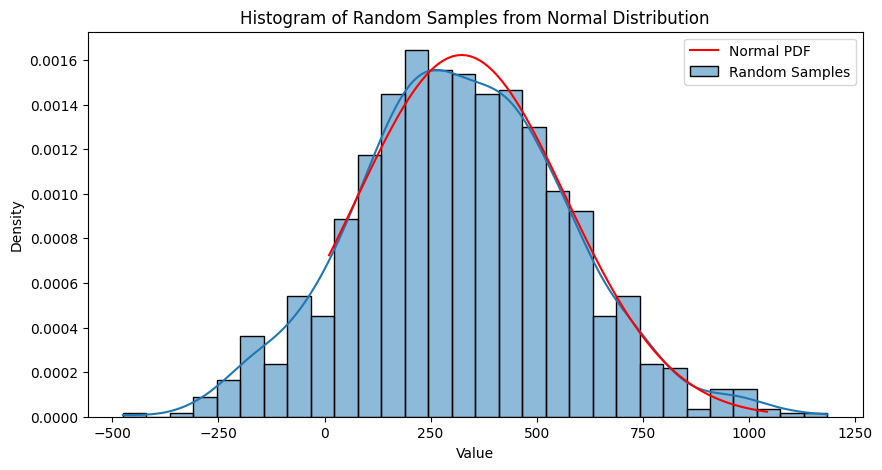

Probability below mean: 0.5
95th percentile: 727.412134255012


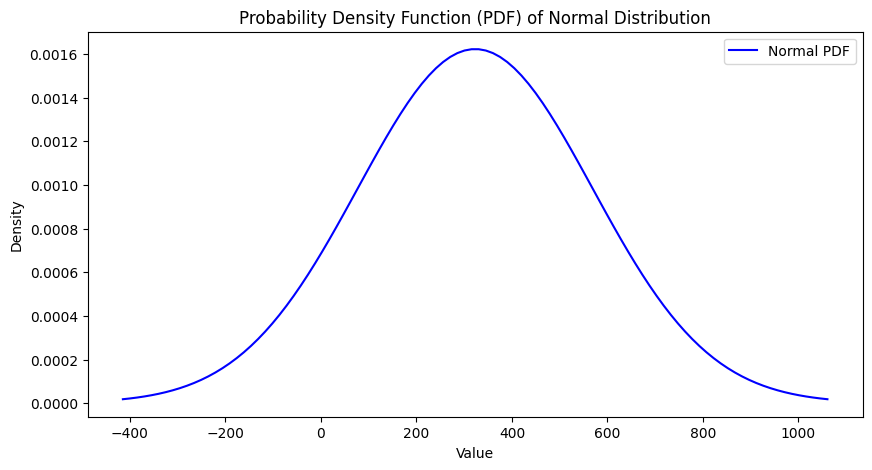

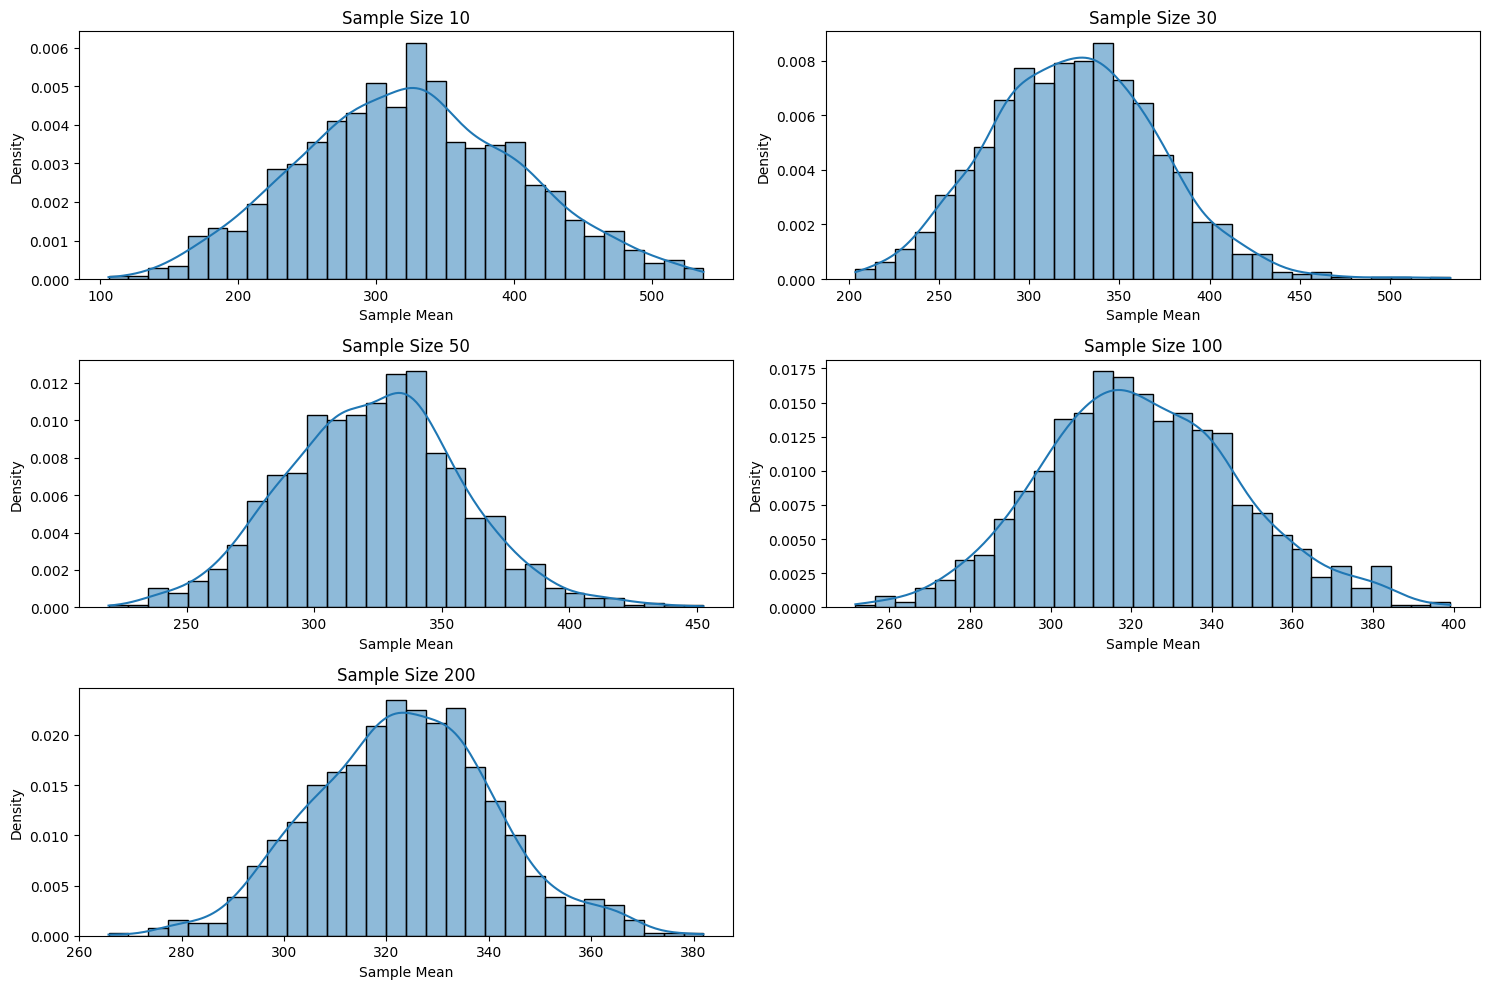

Original Data - Skewness: 0.8912303920037631, Kurtosis: -0.08746991289329031
Sample Size 10 - Skewness: 0.11997052404344713, Kurtosis: -0.3554626182679299
Sample Size 30 - Skewness: 0.2771105161075862, Kurtosis: 0.3973596761057796
Sample Size 50 - Skewness: 0.12995221245956914, Kurtosis: 0.20141336952916689
Sample Size 100 - Skewness: 0.19077723339288313, Kurtosis: -0.056112098948788436
Sample Size 200 - Skewness: 0.07440879163868586, Kurtosis: 0.03412842678932648
99th percentile: 894.981575569966


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Load the dataset
file_path = "supermarket_sales -.csv"
df = pd.read_csv(file_path)

# Select numerical column for analysis
column = "Total"
data = df[column]

# Compute summary statistics
mean_val = data.mean()
std_dev = data.std()

# Plot histogram of original data with normal PDF overlay
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=30, kde=True, stat="density", label="Histogram")
x = np.linspace(data.min(), data.max(), 100)
pdf = norm.pdf(x, mean_val, std_dev)
plt.plot(x, pdf, label="Normal PDF", color="red")
plt.title(f"Histogram of {column} with KDE")
plt.xlabel(column)
plt.ylabel("Density")
plt.legend()
plt.show()

# Generate 1000 random numbers from a normal distribution with dataset's mean and std dev
random_samples = np.random.normal(mean_val, std_dev, 1000)
plt.figure(figsize=(10, 5))
sns.histplot(random_samples, bins=30, kde=True, stat="density", label="Random Samples")
plt.plot(x, pdf, label="Normal PDF", color="red")
plt.title("Histogram of Random Samples from Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Compute CDF: Probability of a value below dataset's mean
prob_below_mean = norm.cdf(mean_val, mean_val, std_dev)
print(f"Probability below mean: {prob_below_mean}")

# Compute 95th percentile
percentile_95 = norm.ppf(0.95, mean_val, std_dev)
print(f"95th percentile: {percentile_95}")

# Plot Probability Density Function (PDF)
x_values = np.linspace(mean_val - 3*std_dev, mean_val + 3*std_dev, 100)
pdf_values = norm.pdf(x_values, mean_val, std_dev)
plt.figure(figsize=(10, 5))
plt.plot(x_values, pdf_values, label="Normal PDF", color="blue")
plt.title("Probability Density Function (PDF) of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Verify CLT: Generate sample means for different sample sizes
def sample_means_distribution(data, sample_sizes, num_samples=1000):
    sample_means = {}
    for size in sample_sizes:
        means = [np.mean(np.random.choice(data, size, replace=True)) for _ in range(num_samples)]
        sample_means[size] = means
    return sample_means

sample_sizes = [10, 30, 50, 100, 200]
sample_means_dict = sample_means_distribution(data, sample_sizes)

# Plot histograms of sample means
plt.figure(figsize=(15, 10))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(sample_means_dict[size], bins=30, kde=True, stat="density")
    plt.title(f"Sample Size {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Compute skewness and kurtosis
original_skewness = skew(data)
original_kurtosis = kurtosis(data)
sample_stats = {size: (skew(sample_means_dict[size]), kurtosis(sample_means_dict[size])) for size in sample_sizes}

print(f"Original Data - Skewness: {original_skewness}, Kurtosis: {original_kurtosis}")
for size, (s, k) in sample_stats.items():
    print(f"Sample Size {size} - Skewness: {s}, Kurtosis: {k}")

# Compute 99th percentile value
percentile_99 = norm.ppf(0.99, mean_val, std_dev)
print(f"99th percentile: {percentile_99}")
